In [1]:
import numpy as np
np.random.seed(1337)  
from keras.models import Sequential 
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [ ]:
# 创建数据集
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # 将数据集随机化
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, )) # 假设我们真实模型为：Y=0.5X+2
# 绘制数据集plt.scatter(X, Y)
plt.show()

In [ ]:
# 创建数据集
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # 将数据集随机化
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, )) # 假设我们真实模型为：Y=0.5X+2
# 绘制数据集plt.scatter(X, Y)
plt.show()

X_train, Y_train = X[:160], Y[:160]     # 把前160个数据放到训练集
X_test, Y_test = X[160:], Y[160:]       # 把后40个点放到测试集

In [7]:
# 定义一个model，
model = Sequential () # Keras有两种类型的模型，序贯模型（Sequential）和函数式模型
                      # 比较常用的是Sequential，它是单输入单输出的
model.add(Dense(output_dim=1, input_dim=1)) # 通过add()方法一层层添加模型
                                            # Dense是全连接层，第一层需要定义输入，
                                            # 第二层无需指定输入，一般第二层把第一层的输出作为输入

# 定义完模型就需要训练了，不过训练之前我们需要指定一些训练参数
# 通过compile()方法选择损失函数和优化器
# 这里我们用均方误差作为损失函数，随机梯度下降作为优化方法
model.compile(loss='mse', optimizer='sgd')

In [14]:
# 开始训练
print('Training -----------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train) # Keras有很多开始训练的函数，这里用train_on_batch（）
    if step % 100 == 0:
        print('train cost: ', cost)

Training -----------
train cost:  0.0020012916
train cost:  0.0020003475
train cost:  0.0020001025
train cost:  0.0020000387



Testing ------------
40/40 [==============================] - 0s 22us/step
test cost: 0.00214907038025558
Weights= [[0.50009716]] 
biases= [1.997379]


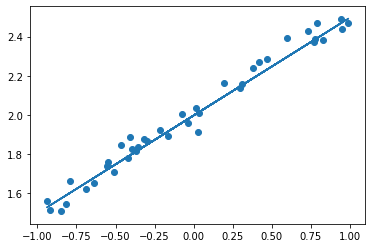

In [15]:
# 测试训练好的模型
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()    # 查看训练出的网络参数
                                        # 由于我们网络只有一层，且每次训练的输入只有一个，输出只有一个
                                        # 因此第一层训练出Y=WX+B这个模型，其中W,b为训练出的参数
print('Weights=', W, '\nbiases=', b)

# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()